# Ice sheet model simulations of the Antarctic Ice Sheet over the last two glacial cycles 

(c) 2020 by Torsten Albrecht (torsten.albrecht@pik-potsdam.de) | Potsdam Institute for Climate Impact Research (PIK)

This example loads and plots results from Torsten Albrecht's ensemble simulations of Antarctica. 

**data:** Albrecht, Torsten (2019): PISM parameter ensemble analysis of Antarctic Ice Sheet glacial cycle simulations. PANGAEA, https://doi.pangaea.de/10.1594/PANGAEA.909728

More details on the ensemble can be found [here](https://doi.org/10.5281/zenodo.3585118).

In [3]:
import intake

## 1. Lazily load the model data
Selected outputs from the model ensemble are stored in two zarr directories in the google cloud. The data are cataloged in intake catalogs to simplify loading. 

present contains fields that describe the state of each ensemble member at the end of the simulation - present-day.

mask_score_time_series contains time series of an integer mask (indicating ice-free/grounded/floating/ocean) and ensemble member score

In [4]:
# load the intake catalog
cat = intake.open_catalog('https://raw.githubusercontent.com/ldeo-glaciology/pangeo-pismpaleo/main/paleopism.yaml')

# load each of the zarr diretories contained in the intake catalog
present  = cat["present"].to_dask()
mask_score_time_series  = cat["mask_score_time_series"].to_dask()

## 2. take a look at the resulting xarrays

### present is a 7-dimensional xarray:

It has dimensions corresponding to each of the four ensemble parameters:
            par_esia, par_ppq, par_prec and par_visc
            
It has one time dimension, but this is only one element long so it can be mostly ignored.

It haas two spatial dimensions, x and y.

In [5]:
present

<xarray.Dataset>
Dimensions:      (par_esia: 4, par_ppq: 4, par_prec: 4, par_visc: 4, time: 1, x: 381, y: 381)
Coordinates:
    lat          (y, x) float64 dask.array<chunksize=(191, 191), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(191, 191), meta=np.ndarray>
  * par_esia     (par_esia) float64 1.0 2.0 4.0 7.0
  * par_ppq      (par_ppq) float64 0.25 0.5 0.75 1.0
  * par_prec     (par_prec) float64 0.02 0.05 0.07 0.1
  * par_visc     (par_visc) float64 1e+20 5e+20 2.5e+21 1e+22
  * time         (time) float64 50.0
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Data variables:
    dbdt         (time, y, x, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    index        (par_esia, par_ppq, par_prec, par_visc) int64 dask.array<chunksize=(4, 4, 4, 4), meta=np.ndarray>
    mask         (time, y, x, par_esia, par_ppq, par_prec, par_visc) int8 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    score        (par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(4, 4, 4, 4), meta=np.ndarray>
    thk          (time, y, x, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    topg         (time, y, x, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    usurf        (time, y, x, par_esia, par_ppq, par_prec, par_visc) float32 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    velsurf_mag  (time, y, x, par_esia, par_ppq, par_prec, par_visc) float32 dask.array<chunksize=(1, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
Attributes:
    NCO:              4.6.8
    command:           /p/tmp/albrecht/pism18/pismOut/pism_paleo/pism1.0_pale...
    history:          Thu Dec  5 15:34:39 2019: ncatted -O -a history,global,...
    parameter_space:  {'visc': [1e+20, 5e+20, 2.5e+21, 1e+22], 'sia_e': [1.0,...

### mask_score_time_series is also 7-dimensional xarray:

It has the same dimensions as present (above), but in `len(mask_score_time_series.time)` returns 125, indicatingthat this dataset has multiple time slices. 

In [6]:
mask_score_time_series

<xarray.Dataset>
Dimensions:   (par_esia: 4, par_ppq: 4, par_prec: 4, par_visc: 4, time: 125, x: 381, y: 381)
Coordinates:
  * par_esia  (par_esia) float64 1.0 2.0 4.0 7.0
  * par_ppq   (par_ppq) float64 0.25 0.5 0.75 1.0
  * par_prec  (par_prec) float64 0.02 0.05 0.07 0.1
  * par_visc  (par_visc) float64 1e+20 5e+20 2.5e+21 1e+22
  * time      (time) float64 -1.24e+05 -1.23e+05 -1.22e+05 ... -2e+03 -1e+03 0.0
  * x         (x) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
  * y         (y) float64 -3.04e+06 -3.024e+06 -3.008e+06 ... 3.024e+06 3.04e+06
Data variables:
    index     (par_esia, par_ppq, par_prec, par_visc) int64 dask.array<chunksize=(4, 4, 4, 4), meta=np.ndarray>
    mask      (time, y, x, par_esia, par_ppq, par_prec, par_visc) int8 dask.array<chunksize=(125, 381, 381, 1, 4, 4, 4), meta=np.ndarray>
    score     (time, par_esia, par_ppq, par_prec, par_visc) float64 dask.array<chunksize=(125, 4, 4, 4, 4), meta=np.ndarray>
Attributes:
    NCO:              4.6.8
    command:           /p/tmp/albrecht/pism18/pismOut/pism_paleo/pism1.0_pale...
    history:          Thu Dec  5 16:44:54 2019: ncatted -O -a history,global,...
    parameter_space:  {'visc': [1e+20, 5e+20, 2.5e+21, 1e+22], 'sia_e': [1.0,...

## 3. Let's plot the ice velocity field of one ensemble members
To select one of the ensemble members you need to choose a value for each of the four 

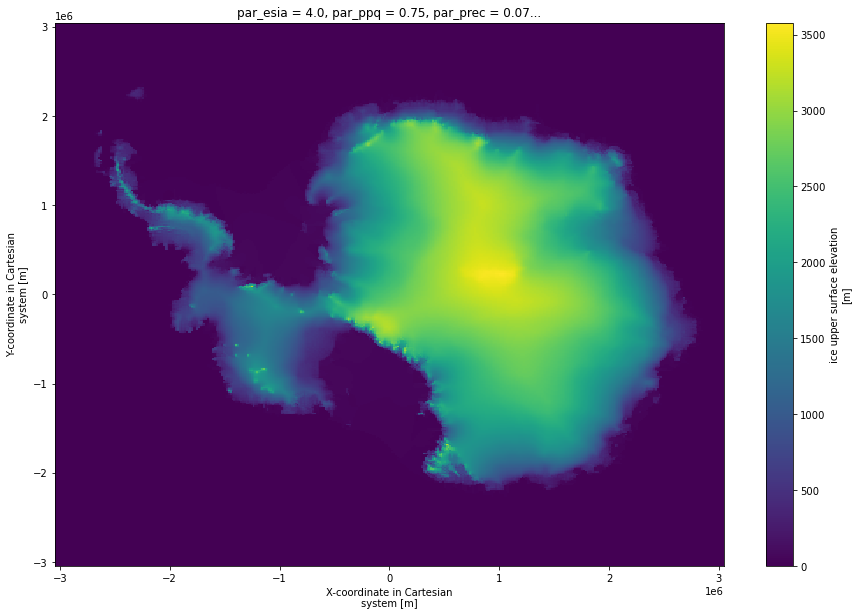

In [7]:
present.usurf.isel(par_esia=2,par_ppq = 2, par_prec= 2,par_visc = 2).plot(size = 10)

## 4. Do some calculations using all ensemble members 
xarrays are a convenient way of dealing with such high-dimensional data


### 4a. calculate the mean thickness in each location across the ensemble

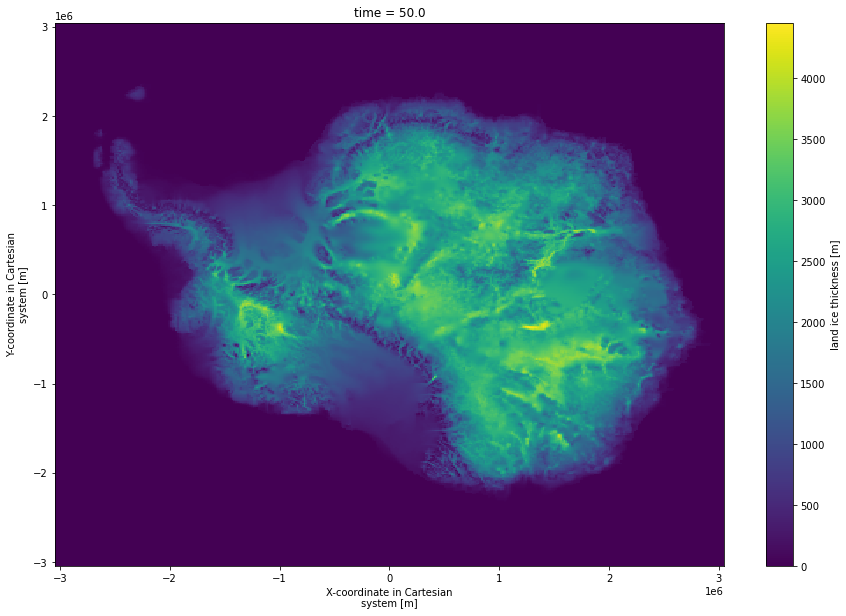

In [8]:
mean_thk = present.thk.mean({'par_esia','par_visc','par_ppq','par_prec'},keep_attrs=True)
mean_thk.plot(size = 10)

## 4b. Compute anomalies
Compute the difference between several ensemble members and the ensemble-wide mean computed above, then plot the results as an array of plots.

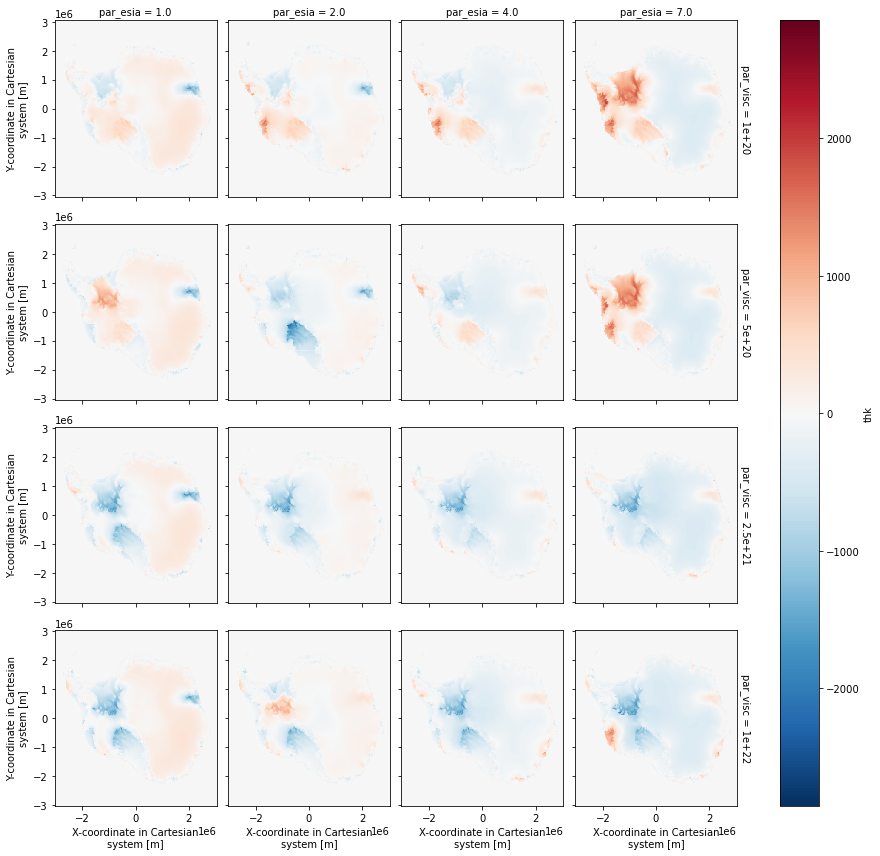

In [54]:
(present.thk.isel(par_ppq=3,par_prec=2)-mean_thk).plot(x='x',y='y',col='par_esia',row='par_visc');

## 5. Plot the time slice data. 

### 5a. plot a time series of ice shelf area

In [11]:
cellArea = mask_score_time_series.x.attrs['spacing_meters'] * mask_score_time_series.y.attrs['spacing_meters']

In [16]:
ice_shelf_area

<xarray.DataArray 'mask' (time: 125)>
dask.array<mul, shape=(125,), dtype=float64, chunksize=(125,), chunktype=numpy.ndarray>
Coordinates:
    par_esia  float64 2.0
    par_ppq   float64 0.75
    par_prec  float64 0.07
    par_visc  float64 1e+22
  * time      (time) float64 -1.24e+05 -1.23e+05 -1.22e+05 ... -2e+03 -1e+03 0.0
Attributes:
    unit:     m^2

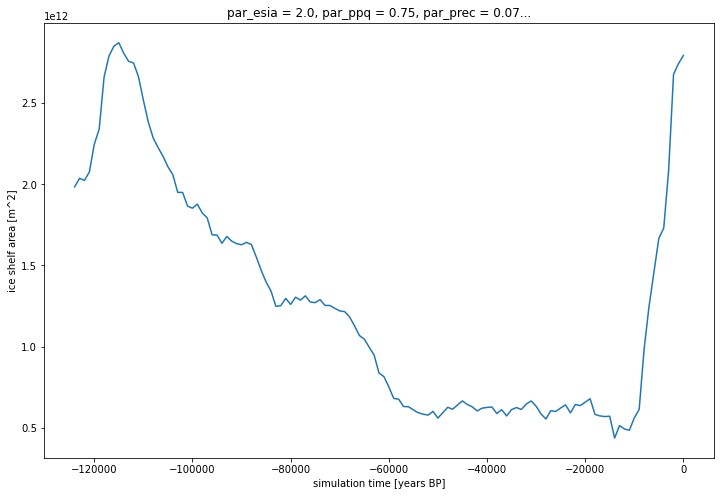

In [19]:
import xarray as xr
ice_shelf_area = (xr.where(mask_score_time_series.mask.isel(par_esia=1, par_ppq=2, par_prec=2, par_visc=3) == 3 ,1 ,0 ).sum(['x','y'])*cellArea)
ice_shelf_area.attrs['units'] = 'm^2'
ice_shelf_area.attrs['long_name'] = 'ice shelf area'
ice_shelf_area.time.attrs['long_name'] = 'simulation time'
ice_shelf_area.time.attrs['units'] = 'years BP'
p = ice_shelf_area.plot(size=8)


## 5b. Choose one of the ensemble members and plot out masks for several time slices

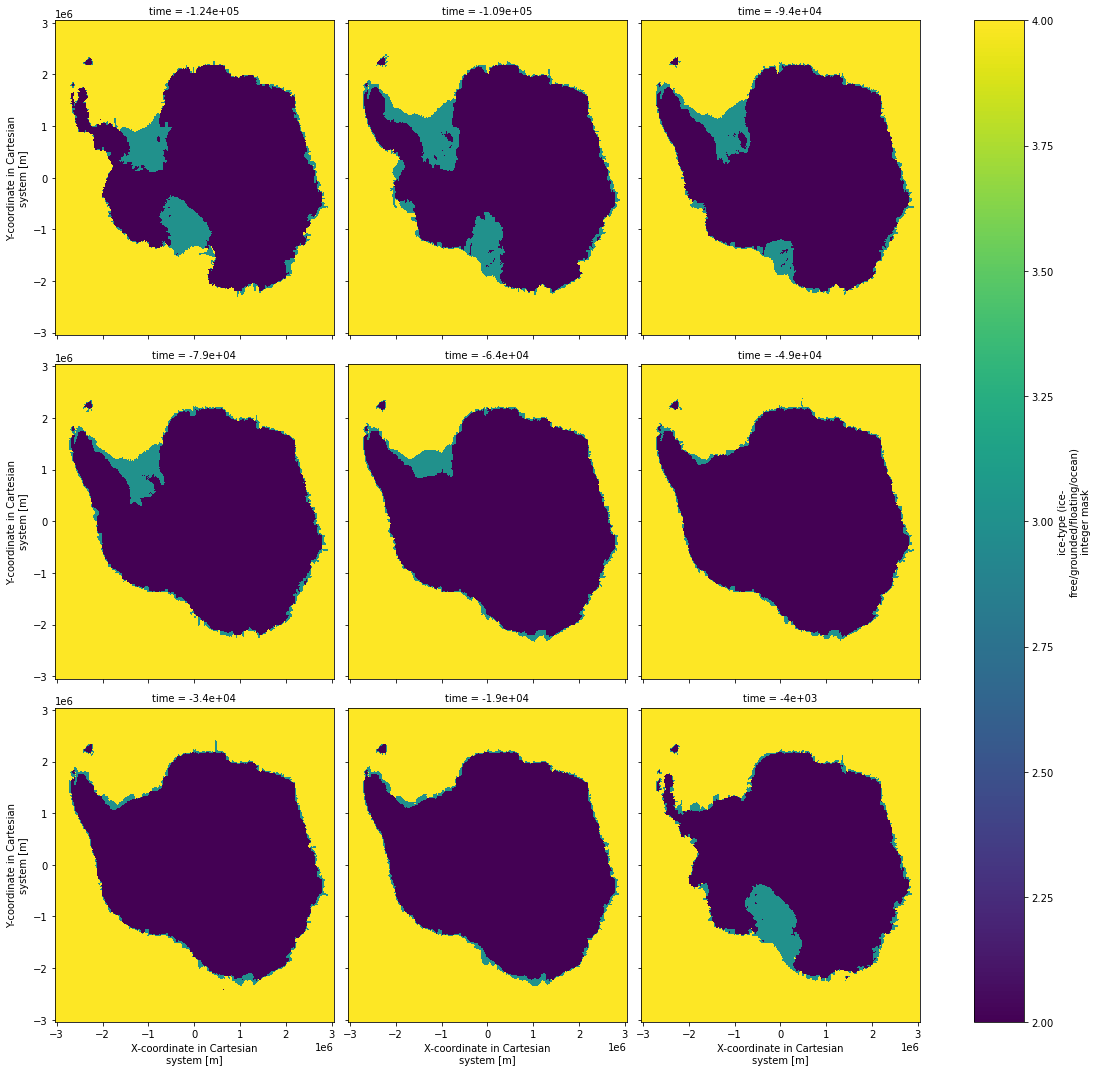

In [68]:
mask_score_time_series.mask.isel(par_esia=1, par_ppq=2, par_prec=2, par_visc=3,
                       time=slice(0,124,15)).plot(x='x',y='y',col='time',col_wrap=3,size = 5)

## 6. Plot a map of the most deglaciated each location becomes across the whole ensemble and all time.

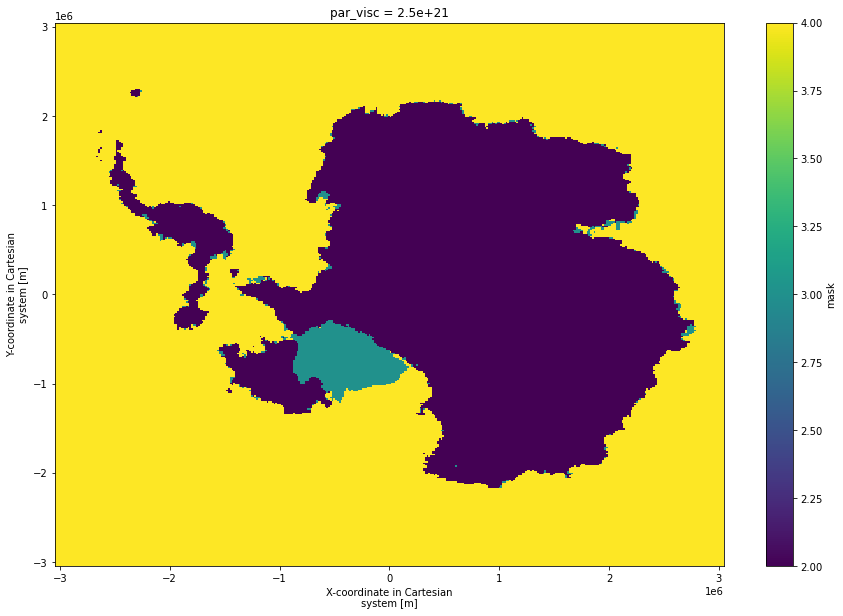

In [22]:
mask_score_time_series.mask.isel(par_visc=2).max({"par_esia","par_ppq","par_prec","time"}).plot(size = 10)